In [1]:
import pandas as pd
import numpy as np

# 1. LOADING THE DATASET

In [2]:
df=pd.read_csv('owid-covid-data.csv',index_col=0)

# 6.CONVERTING DATE COLUMN INTO ORDINAL

In [3]:
import datetime as dt

In [4]:
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)


# 2.SUBSETTING THE DATAFRAMES WITH LOCATION AS "INDIA"

In [5]:
df1=open('user data.csv','w')

In [6]:
df1=df[df["location"]=="India"]

In [7]:
df1

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
iso_code,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,737424,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,737425,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,737426,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,737427,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,737428,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,737429,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,737430,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,737431,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
IND,Asia,India,737432,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


# 3.HANDLING THE MISSING VALUE

### a. CHECK IF THERE IS ANY COLUMN WITH MORE THAN 50% NULL VALUE:

In [8]:
(df1.isna().sum()/220)*100

continent                           0.000000
location                            0.000000
date                                0.000000
total_cases                         0.000000
new_cases                           0.000000
total_deaths                        0.000000
new_deaths                          0.000000
total_cases_per_million             0.000000
new_cases_per_million               0.000000
total_deaths_per_million            0.000000
new_deaths_per_million              0.000000
new_tests                          40.909091
total_tests                        38.181818
total_tests_per_thousand           38.181818
new_tests_per_thousand             40.909091
new_tests_smoothed                 35.909091
new_tests_smoothed_per_thousand    35.909091
tests_per_case                     35.909091
positive_rate                      35.909091
tests_units                        32.727273
stringency_index                    0.454545
population                          0.000000
population

#### THERE ARE NO COLUMN WITH MORE THAN 50% OF NULL VALUE. SO NO NEED FOR DROPPING ANY COLUMN.

### b.CONVERTING ALL THE NULL VALUES IN ORDINAL COLUMN WITH THEIR MODE:

In [9]:
newTests=df1["new_tests"]

In [10]:
mode2=newTests.mode()[0]

In [11]:
newTests.fillna(mode2,inplace=True)

E:\anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
totalTest=df1["total_tests"]

In [13]:
mode1=totalTest.mode()[0]

In [14]:
totalTest.fillna(mode1,inplace=True)

In [15]:
new_tests_smoothed=df1["new_tests_smoothed"]

In [16]:
new_tests_smoothed.fillna(new_tests_smoothed.mode()[0],inplace=True)

### C.CONVERTING ALL THE NULL VALUES IN CATOGERICAL COLUMN WITH THEIR MODE: 

In [17]:
tests_units=df1["tests_units"]

In [18]:
tests_units.fillna(tests_units.mode()[0],inplace=True)

### d.CONVERTING ALL THE NULL VALUES IN CONTINUES COLUMN WITH THEIR MEAN: 

In [19]:
total_tests_per_thousand=df1["total_tests_per_thousand"]

In [20]:
total_tests_per_thousand.fillna(total_tests_per_thousand.mean(),inplace=True)

In [21]:
new_tests_per_thousand=df1["new_tests_per_thousand"]

In [22]:
new_tests_per_thousand.fillna(new_tests_per_thousand.mean(),inplace=True)

In [23]:
new_tests_smoothed_per_thousand=df1["new_tests_smoothed_per_thousand"]

In [24]:
new_tests_smoothed_per_thousand.fillna(new_tests_smoothed_per_thousand.mean(),inplace=True)

In [25]:
tests_per_case=df1["tests_per_case"]

In [26]:
tests_per_case.fillna(tests_per_case.mean(),inplace=True)

In [27]:
positive_rate=df1["positive_rate"]

In [28]:
positive_rate.fillna(positive_rate.mean(),inplace=True)

In [29]:
stringency_index=df1["stringency_index"]

In [30]:
stringency_index.fillna(stringency_index.mean(),inplace=True)

In [31]:
df1.isna().sum()

continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
e

#### ALL COLUMNS HAVE NO NULL VALUES 

# 4.UNIVARIATE ANALYSIS 

### a.TO DRAW HISTOGRAMS FOR 10 FEATURES

In [32]:
import matplotlib.pyplot as plt

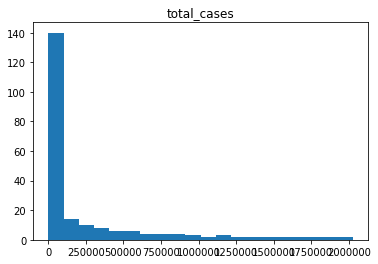

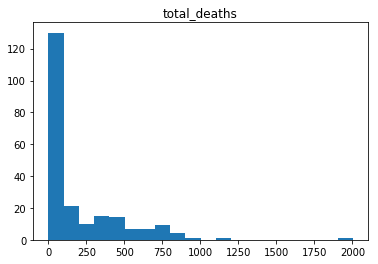

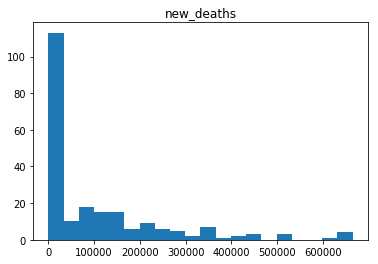

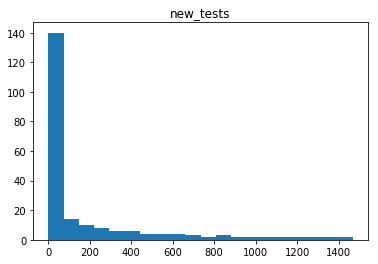

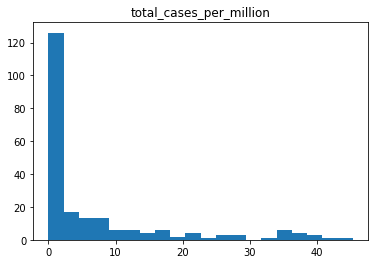

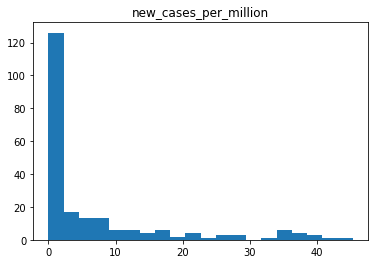

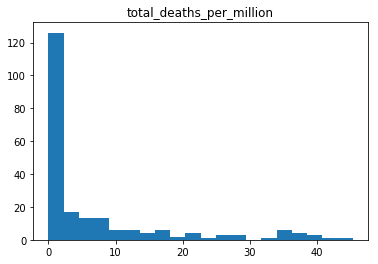

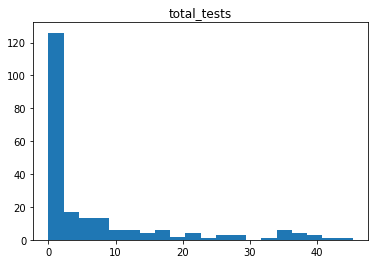

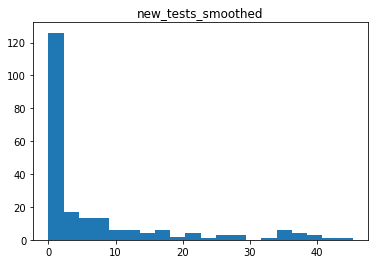

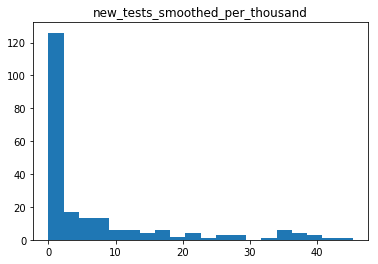

<Figure size 432x288 with 0 Axes>

In [33]:
a=df1["total_cases"]
b=df1["total_deaths"]
c=df1["new_deaths"]
d=df1["new_tests"]
e=df1["total_cases_per_million"]
f=df1["new_cases_per_million"]
g=df1["total_deaths_per_million"]
h=df1["total_tests"]
i=df1["new_tests_smoothed"]
j=df1["new_tests_smoothed_per_thousand"]

title="total_cases"
plt.title(title)
plt.hist(a,bins=20)
plt.show()
plt.clf()

title="total_deaths"
plt.title(title)
plt.hist(c,bins=20)
plt.show()
plt.clf()

title="new_deaths"
plt.title(title)
plt.hist(d,bins=20)
plt.show()
plt.clf()

title="new_tests"
plt.title(title)
plt.hist(e,bins=20)
plt.show()
plt.clf()

title="total_cases_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.show()
plt.clf()

title="new_cases_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.show()
plt.clf()

title="total_deaths_per_million"
plt.title(title)
plt.hist(f,bins=20)
plt.show()
plt.clf()

title="total_tests"
plt.title(title)
plt.hist(f,bins=20)
plt.show()
plt.clf()

title="new_tests_smoothed"
plt.title(title)
plt.hist(f,bins=20)
plt.show()
plt.clf()

title="new_tests_smoothed_per_thousand"
plt.title(title)
plt.hist(f,bins=20)
plt.show()
plt.clf()

### b.TO FIND MEAN, MEDIAN & MODE FOR ALL COLUMN:

In [34]:
df1.mean()

date                               7.375342e+05
total_cases                        2.666034e+05
new_cases                          9.213973e+03
total_deaths                       6.769382e+03
new_deaths                         1.890227e+02
total_cases_per_million            1.931902e+02
new_cases_per_million              6.676764e+00
total_deaths_per_million           4.905336e+00
new_deaths_per_million             1.369636e-01
new_tests                          1.030347e+05
total_tests                        3.684219e+06
total_tests_per_thousand           4.315772e+00
new_tests_per_thousand             1.262923e-01
new_tests_smoothed                 9.559750e+04
new_tests_smoothed_per_thousand    1.076241e-01
tests_per_case                     1.819218e+01
positive_rate                      6.600709e-02
stringency_index                   5.825808e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820

In [35]:
df1.median()

date                               7.375345e+05
total_cases                        1.648850e+04
new_cases                          1.334500e+03
total_deaths                       5.250000e+02
new_deaths                         3.900000e+01
total_cases_per_million            1.194800e+01
new_cases_per_million              9.670000e-01
total_deaths_per_million           3.800000e-01
new_deaths_per_million             2.850000e-02
new_tests                          2.891000e+04
total_tests                        3.536230e+05
total_tests_per_thousand           4.315772e+00
new_tests_per_thousand             1.262923e-01
new_tests_smoothed                 2.881600e+04
new_tests_smoothed_per_thousand    1.076241e-01
tests_per_case                     1.819218e+01
positive_rate                      6.600709e-02
stringency_index                   7.639000e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820

In [36]:
df["total_cases"].mode()[0]

0.0

In [37]:
df["new_cases"].mode()[0]


0.0

In [38]:
df["total_deaths"].mode()[0]


0.0

In [39]:
df["new_deaths"].mode()[0]


0.0

In [40]:
df["total_cases_per_million"].mode()[0]


0.0

In [41]:
df["new_cases_per_million"].mode()[0]


0.0

In [42]:
df["total_deaths_per_million"].mode()[0]


0.0

In [43]:
df["new_deaths_per_million"].mode()[0]


0.0

In [44]:
df["new_tests_smoothed"].mode()[0]


0.0

In [45]:
df["diabetes_prevalence"].mode()[0]

2.42

In [46]:
df1.mode()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Asia,India,737424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,NaN,NaN,737425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,737426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,737427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,737428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,737429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,737430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,737431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,737432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,737433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5.BIVARIATE ANALYSIS:

### a.SCATTER PLOTS: 

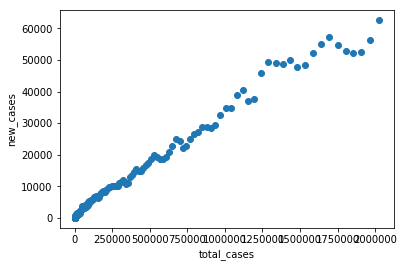

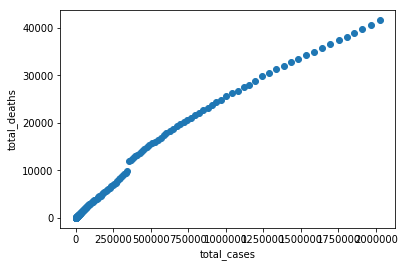

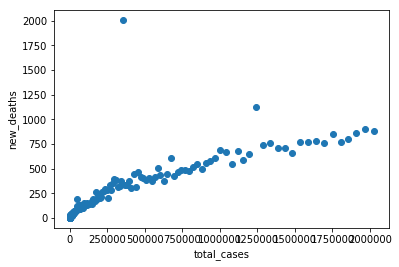

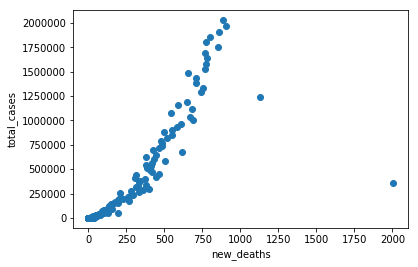

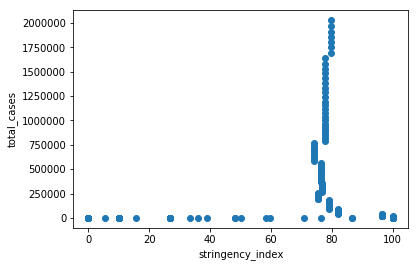

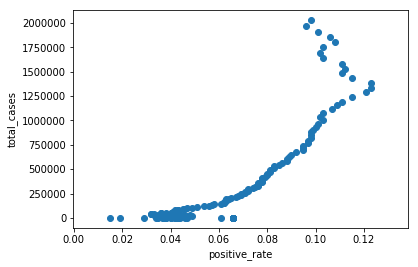

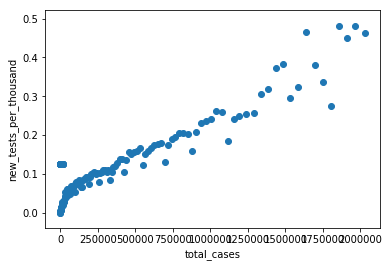

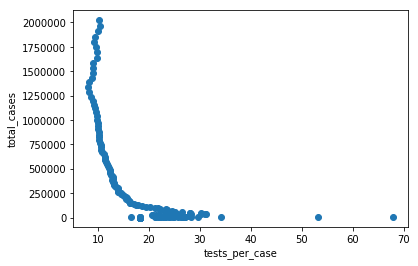

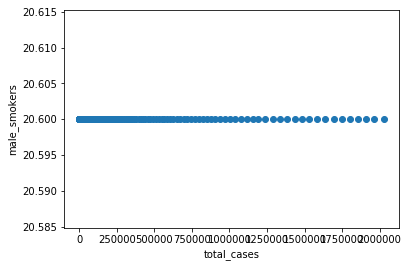

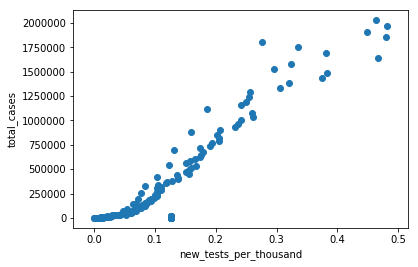

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(df1['total_cases'],df1['new_cases'])
plt.xlabel('total_cases')
plt.ylabel('new_cases')
plt.show()
plt.clf()
      

plt.scatter(df1['total_cases'],df1['total_deaths'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.show()
plt.clf()


plt.scatter(df1['total_cases'],df1['new_deaths'])
plt.xlabel('total_cases')
plt.ylabel('new_deaths')
plt.show()
plt.clf()
            
plt.scatter(df1['new_deaths'],df1['total_cases'])
plt.xlabel('new_deaths')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.scatter(df1['stringency_index'],df1['total_cases'])
plt.xlabel('stringency_index')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.scatter(df1['positive_rate'],df1['total_cases'])
plt.xlabel('positive_rate')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.scatter(df1['total_cases'],df1['new_tests_per_thousand'])
plt.xlabel('total_cases')
plt.ylabel('new_tests_per_thousand')
plt.show()
plt.clf()

plt.scatter(df1['tests_per_case'],df1['total_cases'])
plt.xlabel('tests_per_case')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.scatter(df1['total_cases'],df1['male_smokers'])
plt.xlabel('total_cases')
plt.ylabel('male_smokers')
plt.show()
plt.clf()

plt.scatter(df1['new_tests_per_thousand'],df1['total_cases'])
plt.xlabel('new_tests_per_thousand')
plt.ylabel('total_cases')
plt.show()
plt.clf()

### b.LINE PLOT:

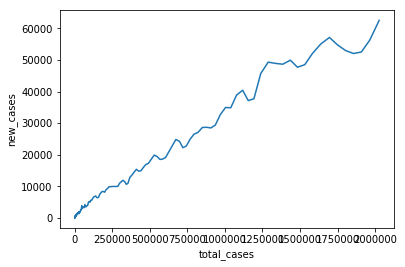

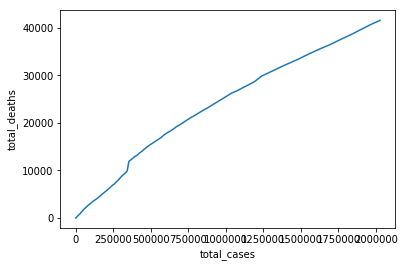

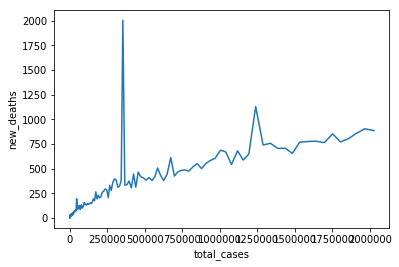

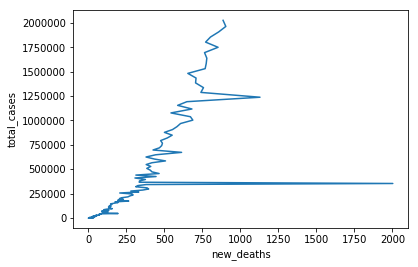

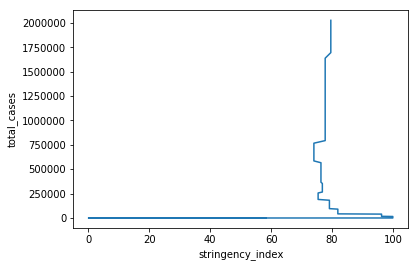

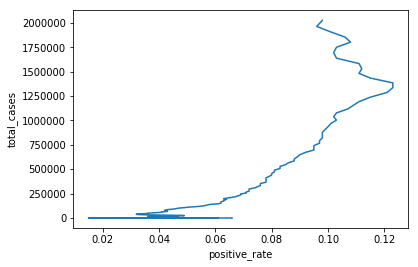

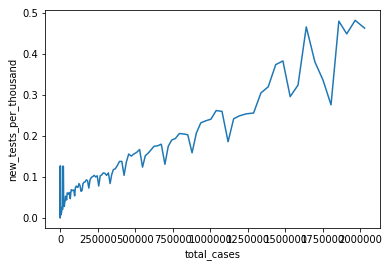

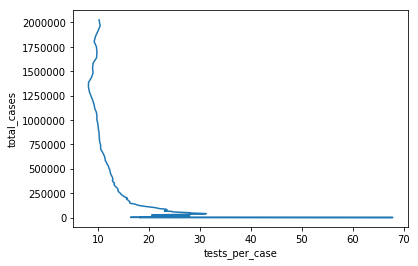

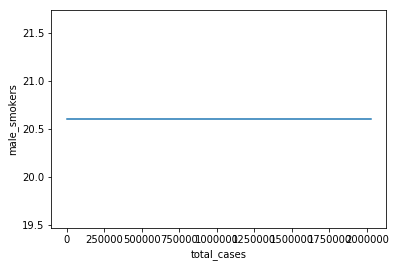

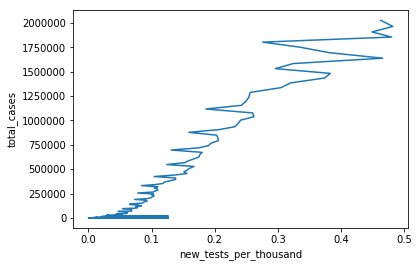

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(df1['total_cases'],df1['new_cases'])
plt.xlabel('total_cases')
plt.ylabel('new_cases')
plt.show()
plt.clf()
      

plt.plot(df1['total_cases'],df1['total_deaths'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.show()
plt.clf()


plt.plot(df1['total_cases'],df1['new_deaths'])
plt.xlabel('total_cases')
plt.ylabel('new_deaths')
plt.show()
plt.clf()
            
plt.plot(df1['new_deaths'],df1['total_cases'])
plt.xlabel('new_deaths')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.plot(df1['stringency_index'],df1['total_cases'])
plt.xlabel('stringency_index')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.plot(df1['positive_rate'],df1['total_cases'])
plt.xlabel('positive_rate')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.plot(df1['total_cases'],df1['new_tests_per_thousand'])
plt.xlabel('total_cases')
plt.ylabel('new_tests_per_thousand')
plt.show()
plt.clf()

plt.plot(df1['tests_per_case'],df1['total_cases'])
plt.xlabel('tests_per_case')
plt.ylabel('total_cases')
plt.show()
plt.clf()

plt.plot(df1['total_cases'],df1['male_smokers'])
plt.xlabel('total_cases')
plt.ylabel('male_smokers')
plt.show()
plt.clf()

plt.plot(df1['new_tests_per_thousand'],df1['total_cases'])
plt.xlabel('new_tests_per_thousand')
plt.ylabel('total_cases')
plt.show()
plt.clf()

# 7.DROPPING USELESS CATEGORICAL COLUMNS AND CONVERTING USEFULL CATEGORICAL COLUMN INTO NUMERICAL

In [49]:
df1=df1.drop(['continent','tests_units'],axis=1)

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label=LabelEncoder()

In [52]:
label.fit(df1['location'])

LabelEncoder()

In [53]:
df1['location']=label.transform(df1['location'])

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, IND to IND
Data columns (total 33 columns):
location                           220 non-null int32
date                               220 non-null int64
total_cases                        220 non-null float64
new_cases                          220 non-null float64
total_deaths                       220 non-null float64
new_deaths                         220 non-null float64
total_cases_per_million            220 non-null float64
new_cases_per_million              220 non-null float64
total_deaths_per_million           220 non-null float64
new_deaths_per_million             220 non-null float64
new_tests                          220 non-null float64
total_tests                        220 non-null float64
total_tests_per_thousand           220 non-null float64
new_tests_per_thousand             220 non-null float64
new_tests_smoothed                 220 non-null float64
new_tests_smoothed_per_thousand    220 non-null float64
tests_

# 8.SELECTING "TOTAL_CASES" AS TARGET VARIABLE:

In [55]:
y = df1["total_cases"].values


# 9.SELECTING THE OTHER COLUMNS AS FEATURES:

In [56]:
X = df1.drop(["total_cases"],axis=1).values

# 10.PERFORMING TRAIN-TEST SPLIT:

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 11.MODELLING

### a.LINEAR REGRESSION

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
reg_all=LinearRegression()

In [60]:
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### b.RANDOM FOREST REGRESSION

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
randomfor=RandomForestRegressor()

In [63]:
randomfor.fit(X_train,y_train)

E:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# 12.GETTING ACCURACY:

In [64]:
reg_all.score(X_test,y_test)*100

99.99999999993302

In [65]:
randomfor.score(X_test,y_test)*100

99.74429001742081

# 13.PREDICTING TOTAL CASES FOR NEW DATE: 

In [66]:
df2=pd.read_csv("sample data.csv",index_col=0)

In [67]:
df2


,location,date,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
iso_code,,,,,,,,,,,,,,,,,,,,,
IND,0,2020-08-13,2.0,0.0,0.0,18.733,18.733,0.0,0.0,1.0,...,7.452,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29
IND,0,2020-08-20,2.0,0.0,0.0,37.465,18.733,0.0,0.0,1.0,...,7.452,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29


In [68]:
df2=df2.drop("tests_units",axis=1)

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, IND to IND
Data columns (total 32 columns):
location                           2 non-null int64
date                               2 non-null object
new_cases                          2 non-null float64
total_deaths                       2 non-null float64
new_deaths                         2 non-null float64
total_cases_per_million            2 non-null float64
new_cases_per_million              2 non-null float64
total_deaths_per_million           2 non-null float64
new_deaths_per_million             2 non-null float64
new_tests                          2 non-null float64
total_tests                        2 non-null float64
total_tests_per_thousand           2 non-null float64
new_tests_per_thousand             2 non-null float64
new_tests_smoothed                 2 non-null float64
new_tests_smoothed_per_thousand    2 non-null float64
tests_per_case                     2 non-null float64
positive_rate                      2 no

In [70]:
df2["date"]=pd.to_datetime(df2["date"])
df2["date"]=df2["date"].map(dt.datetime.toordinal)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, IND to IND
Data columns (total 32 columns):
location                           2 non-null int64
date                               2 non-null int64
new_cases                          2 non-null float64
total_deaths                       2 non-null float64
new_deaths                         2 non-null float64
total_cases_per_million            2 non-null float64
new_cases_per_million              2 non-null float64
total_deaths_per_million           2 non-null float64
new_deaths_per_million             2 non-null float64
new_tests                          2 non-null float64
total_tests                        2 non-null float64
total_tests_per_thousand           2 non-null float64
new_tests_per_thousand             2 non-null float64
new_tests_smoothed                 2 non-null float64
new_tests_smoothed_per_thousand    2 non-null float64
tests_per_case                     2 non-null float64
positive_rate                      2 non

In [71]:
pre=df2.iloc[0]

In [72]:
pre = np.squeeze(np.asarray(pre))

In [73]:
pre=pre.reshape(1,-1)
pre.shape

(1, 32)

In [76]:
reg_all.predict(pre).round()

array([26731.])

In [77]:
randomfor.predict(pre).round()

array([418880.])

### SO IN THE ABOVE CODE, I HAVE CREATED A CSV FILE WITH SOME RANDOM DATA IN IT. I HAVE CONSIDERED THE FIRST ROW IN CSV FILE, WHICH HAS A DATE OF "2020-08-13" AND THERE IS TWO PREDICTION PROVIDED BY THE LINEAR AND RANDOM FOREST REGRESSION.